In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 17 16:48:11 2015

@author: ruifpmaia
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

%matplotlib inline

In [2]:
def processOutput(path, dataset, train_epo):
    print "*********************************"
    print "Analysing dataset [%s] results on [%s]" % (dataset, path )
    print "*********************************"
    rmse = {}
    mae = {}
    min_rmse = {}
    rmse_train = {}
    min_k = 0 # minimun RMSE on the test
    # For each k...
    #for k in [5,10,15,20,25]:
    #for k in [5,25,50,100]:
    for k in [5,25]:
        #print "Getting RSME for k=" + str(k)
        extension = "*.k" + str(k) + ".csv"
        test_count = 0;
        # print extension
        rmse[k] = 0.0
        mae[k] = 0.0
        rmse_train[k] = {}
        min_rmse[k] = {'min':0, 'idx':0, 'file':''}
        for ix in range(train_epo):
            rmse_train[k][ix]=0            
        # Analyse each file...
        for filename in glob.glob(os.path.join(path, extension)):
            #print filename
            if (filename.find(dataset) >= 0):        
                # read results file
                df = pd.read_csv(filename, usecols=[0], sep='\t')
                mae_col = pd.read_csv(filename, usecols=[1], sep='\t')
                # get last RMSE and add it to the total rmse
                rmse[k] += df.values[train_epo-1]
                mae[k] += mae_col.values[train_epo-1]
                train_iter_idx = 0
                test_count += 1
                # add iteration values to dic                 
                for iter_val in range(train_epo):
                    rmse_train[k][train_iter_idx] += df.values[train_iter_idx]
                    if (min_rmse[k]['min'] == 0):
                        min_rmse[k]['min'] = df.values[train_iter_idx]
                        min_rmse[k]['idx'] = train_iter_idx
                        min_rmse[k]['file'] = filename
                    elif (min_rmse[k]['min'] > df.values[train_iter_idx]):
                        min_rmse[k]['min'] = df.values[train_iter_idx]   
                        min_rmse[k]['idx'] = train_iter_idx
                        min_rmse[k]['file'] = filename
                    train_iter_idx += 1     
        #get the average of RMSE for K = n
        rmse[k] /= test_count
        mae[k] /= test_count
        if (k == 5):
            min_k = 5
        elif (rmse[k] < rmse[min_k]):
            min_k = k
        train_iter_idx = 0
        for iter_val in rmse_train[k]:
            rmse_train[k][train_iter_idx] /= test_count
            train_iter_idx += 1        
        print "Average RMSE for k=" + str(k) + ": %.4f" % rmse[k]
    return (rmse_train, rmse, mae, min_k)


def Analyse(path, dataset_list, train_epo):
    legend = []
    res_dic = {}
    plt.gca().set_color_cycle(['red', 'green', 'blue', 'yellow', 'gray'])
    x = np.arange(train_epo)
    for dataset in dataset_list:
        avgres = 0.0
        res_dic[dataset] = {}
        (rmse_train, rmse, mae, min_k) = processOutput(path, dataset, train_epo)
        plt.plot(x, rmse_train[min_k].values())
        legend.append("%s[k%d] RMSE:%.4f MAE:%.4f" % (dataset, min_k, rmse[min_k], mae[min_k]))
        res_dic[dataset][str('FM-k%d'% min_k)] = rmse[min_k][0]
    fig = plt.gcf()
    fig.set_size_inches(13,9)
    plt.grid(True)
    plt.legend(legend, loc='upper left')
    plt.show()
    plt.draw()
    return 0


def Baseline(dataset):
    try:
        avgres_fn = dataset + ".rmse.avg"
        with open(avgres_fn) as resf:
            avgres = float(resf.readline())
    except IOError:
        print "No RMSE result using AVG for Prediction" 
    try:
        maeres_fn = dataset + ".mae.avg"
        with open(maeres_fn) as resf:
            maeres = float(resf.readline())
    except IOError:
        print "No MAE result using AVG for Prediction"
    print ("%s\nRMSE-AVG:%.4f\nMAE-AVG:%.4f" % (dataset, float(avgres), float(maeres)))   

### Food.com73k Classification

In [3]:
with open('food.com\\Data73k\\foodcom_classification', 'r') as fin:
    print fin.read()
print '-------------------'
print 'foodcom_ds- Rating + Users + Item\nfoodcom_ds2- Rating + Users + Item + AvgRatUser\nfoodcom_ds3- Rating + Users + Item + AvgRatUser + StdDevUser\nfoodcom_ds4- Rating + Users + Item + AvgRatItem\nfoodcom_ds5- Rating + Users + Item + AvgRatItem + StdDevItem\nfoodcom_ds6- Rating + Users + Item + AvgRatUser + AvgRatItem\nfoodcom_ds7- Rating + Users + Item + AvgRatUser + StdDevUser + AvgRatItem + StdDevItem\nfoodcom_ds8 - Rating + Users + Item + Ingredients\nfoodcom_ds9 - Rating + Users + Item + Ingredients + Categories\nfoodcom_ds10 - Rating + Users + Item + Ingredients + Categories + Groups\nfoodcom_ds11 - Rating + Users + Item + Ingredients + AvgRatUser + AvgRatItem\nfoodcom_ds12 - Rating + Users + Item + Ingredients + Categories + AvgRatUser + AvgRatItem\nfoodcom_ds13 - Rating + Users + Item + Ingredients + Categories + Groups + AvgRatUser + AvgRatItem'
print 'foodcom_ds14 - Rating + Users + Item + Categories\nfoodcom_ds15 - Rating + Users + Item + Groups\nfoodcom_ds16 - Rating + Users + Item + Categories + AvgRatUser + AvgRatItem\nfoodcom_ds17 - Rating + Users + Item + Groups + AvgRatUser + AvgRatItem'
print '-------------------'

Number of users:5852
Number of items:8988
Number of events:73695
Number of ingredients:2861
Number of cuisine types:95
Number of dietary groups:28
Avg. rating value:4.74
Avg. number of ratings per user:12.59
Avg. number of ratings per item:8.20
Avg. number of ingredients per item:69.23
Avg. number of cuisine type per item:9.10
Avg. number of dietary groups per item:22.79
Sparsity on the ratings matrix:0.140%

-------------------
foodcom_ds- Rating + Users + Item
foodcom_ds2- Rating + Users + Item + AvgRatUser
foodcom_ds3- Rating + Users + Item + AvgRatUser + StdDevUser
foodcom_ds4- Rating + Users + Item + AvgRatItem
foodcom_ds5- Rating + Users + Item + AvgRatItem + StdDevItem
foodcom_ds6- Rating + Users + Item + AvgRatUser + AvgRatItem
foodcom_ds7- Rating + Users + Item + AvgRatUser + StdDevUser + AvgRatItem + StdDevItem
foodcom_ds8 - Rating + Users + Item + Ingredients
foodcom_ds9 - Rating + Users + Item + Ingredients + Categories
foodcom_ds10 - Rating + Users + Item + Ingredients + C

### Food.com Results Analysis - MCMC - 100 iter-5Fold

*********************************
Analysing dataset [foodcom_ds.] results on [food.com\Output73k]
*********************************
Average RMSE for k=5: 0.8422
Average RMSE for k=25: 0.8557
*********************************
Analysing dataset [foodcom_ds2.] results on [food.com\Output73k]
*********************************
Average RMSE for k=5: 0.5828
Average RMSE for k=25: 0.5825
*********************************
Analysing dataset [foodcom_ds3.] results on [food.com\Output73k]
*********************************
Average RMSE for k=5: 0.5871
Average RMSE for k=25: 0.5865
*********************************
Analysing dataset [foodcom_ds4.] results on [food.com\Output73k]
*********************************
Average RMSE for k=5: 0.6084
Average RMSE for k=25: 0.6080
*********************************
Analysing dataset [foodcom_ds5.] results on [food.com\Output73k]
*********************************
Average RMSE for k=5: 0.6071
Average RMSE for k=25: 0.6065
*********************************
Analysi

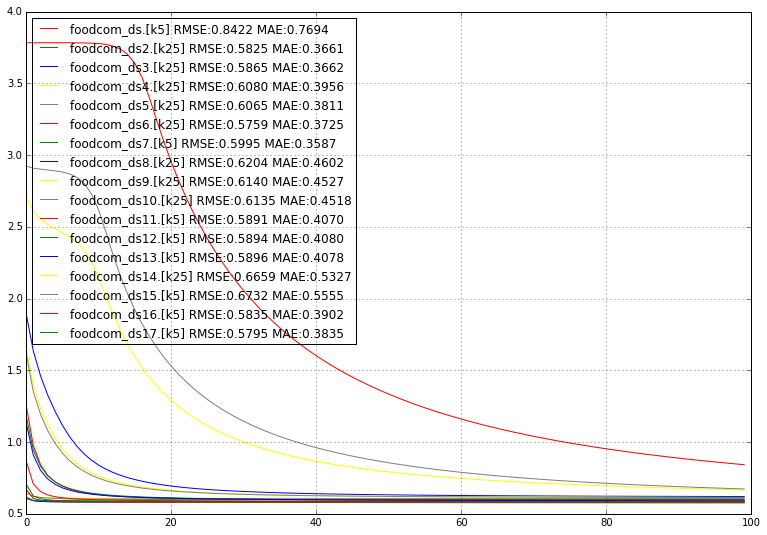

0

In [6]:
Analyse('food.com\\Output73k', ['foodcom_ds.','foodcom_ds2.','foodcom_ds3.','foodcom_ds4.','foodcom_ds5.','foodcom_ds6.','foodcom_ds7.','foodcom_ds8.','foodcom_ds9.','foodcom_ds10.','foodcom_ds11.','foodcom_ds12.','foodcom_ds13.', 'foodcom_ds14.','foodcom_ds15.','foodcom_ds16.','foodcom_ds17.'], 100)

### Baseline (Average)

In [8]:
Baseline('food.com\\Output73k\\foodcom_ds')

food.com\Output73k\foodcom_ds
RMSE-AVG:0.6086
MAE-AVG:0.3610


### User Rating Average and Standard Deviation Histograms

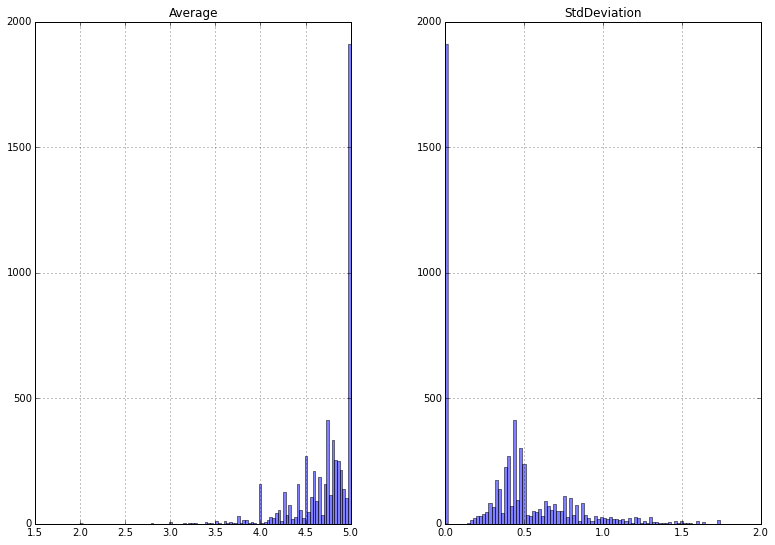

In [9]:
user_stats = pd.read_csv('food.com\\Data73k\\foodcom_ds.user.avgstd', usecols=[0,1], sep='\t')
user_stats.hist(alpha=0.5, bins=100)
fig = plt.gcf()
fig.set_size_inches(13,9)
plt.show()


### Item Rating Average and Standard Deviation Histograms

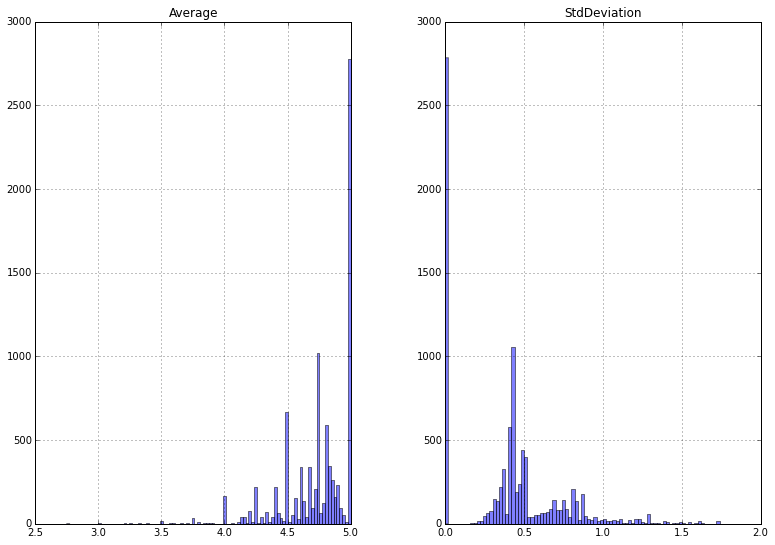

In [10]:
item_stats = pd.read_csv('food.com\\Data73k\\foodcom_ds.item.avgstd', usecols=[0,1], sep='\t')
item_stats.hist(alpha=0.5, bins=100)
fig = plt.gcf()
fig.set_size_inches(13,9)
plt.show()